In [3]:
from statistics import mean, median
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# Lp norm of two given data
def distance(Class1, Class2, p):
    sum = 0
    size_of_sttribute = len(Class1)
    #print("in dist(), # of attr:", size_of_sttribute)
    for i in range(size_of_sttribute-1):
        sum += math.pow(abs(float(Class1[i])-float(Class2[i])),p)
    for i in range(p-1):
        #print("sqrt once")
        sum = math.sqrt(sum)
    return sum

def assign(x_input, centroids):
    k = len(centroids)
    #print("in assign, k=",k)
    label = [-1]*len(x_input)
    for i in range(len(x_input)):
        dist = [-1]*k
        # calculate the distance to all centroids
        for j in range(k):
            dist[j] = distance(x_input[i], centroids[j], 2)
        # choose the minimum one as the label
        label[i] = dist.index(min(dist))
    # return list of label
    return label

# for a given data point, k value, and initial centroids
# return the list of label and the final centroids
def k_means_cs171(x_input, k, init_centroids):
    centroids = init_centroids
    cluster_assignments = [-1]*len(x_input)
    iter = 0
    # first time cluster assign
    label = assign(x_input, centroids)
    while cluster_assignments != label:
        iter +=1
        cluster_assignments = label
        # clean centroids
        # centroids[] to accumulate the attribute of same cluster,
        centroids=[ [0] * len(x_input[0]) for i in range(k) ]
        # count[] to accumulate of different cluster, initialize as [0,0,0,0,0,...]
        count = [0]*k
        # update centroids[] and count[]
        for i in range(len(label)):
            count[label[i]] += 1
            for s in range(len(centroids[0])):
                centroids[label[i]][s] += float(x_input[i][s])
        # calculate the new centroids
        for x in range(k):
            if count[x] == 0:
                count[x] = 1
        for i in range(len(centroids)):
            for s in range(len(centroids[i])):
                centroids[i][s] = centroids[i][s]/count[i]
        # update cluster_assignments
        label = assign(x_input, centroids)
    # print("iterator:",iter)
    return cluster_assignments,centroids

def sum_of_error2(x_input, cluster_assignments,cluster_centroids):
    dist = 0
    for i in range(len(x_input)):
        # print(cluster_assignments[i])
        dist += distance(x_input[i], cluster_centroids[int(cluster_assignments[i]) ], 2)
    return dist

# see if initial centroids contains dupliate points
def check_init(init_centroids, k):
    seen = set(tuple(i) for i in init_centroids)
    if len(seen) == k:
        return False
    return True

# k-means++ inititialize
def kmeanspp(x_input, k):
    init_cent_index = []
    init_centroids = []
    # first centroid is random
    init_cent_index.extend(random.sample(range(len(x_input)), 1) )
    # print("init_index=",init_cent_index)
    if k == 1:
        init_centroids.append(x_input[init_cent_index[0]])
        return init_centroids
    # for the rest centroids
    for i in range(k-1):
        dist = [0]*len(x_input)
        # calculate distance for each data point (skip the point already chosen)
        for j in range(len(x_input)):
            if j not in init_cent_index:
                dist_tmp = 0
                # consider all chosen centroids and pick the largest one
                for s in range(len(init_cent_index)):
                    dist_tmp = max( dist_tmp, distance(x_input[j], x_input[init_cent_index[s]], 2) )
                dist[j] = dist_tmp
        # choose one sample depending on the weight (proportional to distance)
        init_cent_index.extend(random.choices(range(len(x_input)),dist))
    for i in range(k):
        init_centroids.append(x_input[init_cent_index[i]])
    return init_centroids

fp = open('iris.data', "r")
index_of_arrtibute = 4
attr_target_list =[]
init_centroids =[]

i=0
while True:
    data = fp.readline().split(',')
    if data[0] == '\n' or data[0] == '':break
    i+=1
    context = data[0:4]
    label = data[4][:len(data[4])-1]
    if label == 'Iris-setosa':
        context.append(0)
    elif label == 'Iris-versicolor':
        context.append(1)
    elif label == 'Iris-virginica':
        context.append(2)
    else:
        print("in reading file, unexpected label")
    attr_target_list.append(context)
#end of read file

print("size of data point:",len(attr_target_list))
print("size of attribute:",len(attr_target_list[0]))

size of data point: 150
size of attribute: 5


k= 1
init_centroids: [['6.1', '2.9', '4.7', '1.4', 1]]
k= 2
init_centroids: [['4.7', '3.2', '1.3', '0.2', 0], ['7.9', '3.8', '6.4', '2.0', 2]]
k= 3
init_centroids: [['5.1', '2.5', '3.0', '1.1', 1], ['5.9', '3.2', '4.8', '1.8', 1], ['5.6', '2.8', '4.9', '2.0', 2]]
k= 4
init_centroids: [['6.2', '2.9', '4.3', '1.3', 1], ['5.3', '3.7', '1.5', '0.2', 0], ['5.0', '3.4', '1.5', '0.2', 0], ['6.7', '3.0', '5.0', '1.7', 1]]
k= 5
init_centroids: [['5.8', '2.7', '4.1', '1.0', 1], ['5.0', '3.5', '1.3', '0.3', 0], ['6.7', '2.5', '5.8', '1.8', 2], ['7.2', '3.2', '6.0', '1.8', 2], ['5.1', '3.5', '1.4', '0.3', 0]]
k= 6
init_centroids: [['7.2', '3.0', '5.8', '1.6', 2], ['5.4', '3.7', '1.5', '0.2', 0], ['5.7', '3.0', '4.2', '1.2', 1], ['4.8', '3.0', '1.4', '0.3', 0], ['6.9', '3.1', '5.1', '2.3', 2], ['4.9', '3.1', '1.5', '0.1', 0]]
k= 7
init_centroids: [['4.6', '3.2', '1.4', '0.2', 0], ['7.2', '3.2', '6.0', '1.8', 2], ['4.9', '2.4', '3.3', '1.0', 1], ['6.3', '3.3', '4.7', '1.6', 1], ['5.7', '3.8', '1.7',

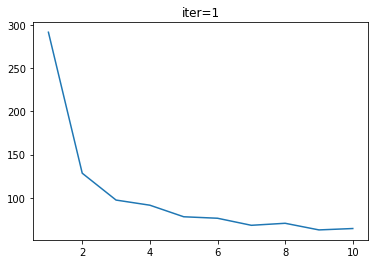

k= 1
init_centroids: [['7.3', '2.9', '6.3', '1.8', 2]]
init_centroids: [['7.7', '2.6', '6.9', '2.3', 2]]
k= 2
init_centroids: [['5.7', '2.8', '4.1', '1.3', 1], ['5.4', '3.9', '1.7', '0.4', 0]]
init_centroids: [['6.3', '2.3', '4.4', '1.3', 1], ['6.4', '3.1', '5.5', '1.8', 2]]
k= 3
init_centroids: [['5.7', '3.0', '4.2', '1.2', 1], ['5.0', '3.2', '1.2', '0.2', 0], ['6.7', '3.0', '5.2', '2.3', 2]]
init_centroids: [['6.5', '3.0', '5.2', '2.0', 2], ['5.5', '2.3', '4.0', '1.3', 1], ['5.1', '3.8', '1.9', '0.4', 0]]
k= 4
init_centroids: [['5.4', '3.0', '4.5', '1.5', 1], ['6.4', '3.1', '5.5', '1.8', 2], ['6.0', '3.4', '4.5', '1.6', 1], ['5.7', '2.8', '4.1', '1.3', 1]]
init_centroids: [['5.3', '3.7', '1.5', '0.2', 0], ['7.2', '3.2', '6.0', '1.8', 2], ['6.8', '2.8', '4.8', '1.4', 1], ['6.7', '2.5', '5.8', '1.8', 2]]
k= 5
init_centroids: [['4.4', '3.0', '1.3', '0.2', 0], ['6.7', '3.3', '5.7', '2.5', 2], ['7.0', '3.2', '4.7', '1.4', 1], ['4.6', '3.4', '1.4', '0.3', 0], ['5.0', '3.4', '1.5', '0.2', 0

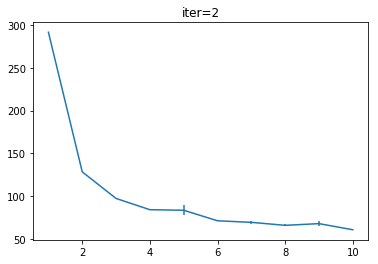

k= 1
init_centroids: [['6.9', '3.1', '5.1', '2.3', 2]]
init_centroids: [['6.7', '3.3', '5.7', '2.5', 2]]
init_centroids: [['6.5', '3.0', '5.8', '2.2', 2]]
init_centroids: [['6.5', '3.2', '5.1', '2.0', 2]]
init_centroids: [['6.3', '3.4', '5.6', '2.4', 2]]
init_centroids: [['5.8', '2.7', '5.1', '1.9', 2]]
init_centroids: [['5.9', '3.2', '4.8', '1.8', 1]]
init_centroids: [['7.2', '3.6', '6.1', '2.5', 2]]
init_centroids: [['5.4', '3.4', '1.7', '0.2', 0]]
init_centroids: [['5.0', '3.5', '1.6', '0.6', 0]]
k= 2
init_centroids: [['6.5', '3.0', '5.5', '1.8', 2], ['5.0', '3.4', '1.5', '0.2', 0]]
init_centroids: [['6.1', '2.6', '5.6', '1.4', 2], ['4.8', '3.4', '1.9', '0.2', 0]]
init_centroids: [['6.9', '3.2', '5.7', '2.3', 2], ['5.1', '3.8', '1.9', '0.4', 0]]
init_centroids: [['6.9', '3.1', '4.9', '1.5', 1], ['4.6', '3.6', '1.0', '0.2', 0]]
init_centroids: [['5.0', '3.0', '1.6', '0.2', 0], ['6.6', '3.0', '4.4', '1.4', 1]]
init_centroids: [['5.1', '3.5', '1.4', '0.3', 0], ['6.1', '2.9', '4.7', '1.

init_centroids: [['5.1', '3.8', '1.6', '0.2', 0], ['7.9', '3.8', '6.4', '2.0', 2], ['6.9', '3.2', '5.7', '2.3', 2], ['5.1', '3.4', '1.5', '0.2', 0], ['4.4', '2.9', '1.4', '0.2', 0], ['4.6', '3.2', '1.4', '0.2', 0], ['5.4', '3.4', '1.5', '0.4', 0]]
init_centroids: [['5.0', '3.6', '1.4', '0.2', 0], ['5.5', '2.5', '4.0', '1.3', 1], ['4.3', '3.0', '1.1', '0.1', 0], ['6.7', '3.0', '5.2', '2.3', 2], ['6.0', '2.9', '4.5', '1.5', 1], ['6.4', '2.8', '5.6', '2.1', 2], ['6.6', '2.9', '4.6', '1.3', 1]]
init_centroids: [['5.7', '2.8', '4.1', '1.3', 1], ['5.4', '3.7', '1.5', '0.2', 0], ['6.7', '3.0', '5.0', '1.7', 1], ['5.7', '4.4', '1.5', '0.4', 0], ['5.2', '3.5', '1.5', '0.2', 0], ['4.6', '3.2', '1.4', '0.2', 0], ['5.1', '3.8', '1.5', '0.3', 0]]
init_centroids: [['6.3', '3.4', '5.6', '2.4', 2], ['4.8', '3.1', '1.6', '0.2', 0], ['5.5', '3.5', '1.3', '0.2', 0], ['7.3', '2.9', '6.3', '1.8', 2], ['5.1', '3.5', '1.4', '0.3', 0], ['6.5', '3.0', '5.8', '2.2', 2], ['5.5', '2.5', '4.0', '1.3', 1]]
init_cen

init_centroids: [['5.2', '3.4', '1.4', '0.2', 0], ['6.0', '2.9', '4.5', '1.5', 1], ['6.4', '2.9', '4.3', '1.3', 1], ['6.0', '2.2', '4.0', '1.0', 1], ['5.0', '3.3', '1.4', '0.2', 0], ['5.2', '2.7', '3.9', '1.4', 1], ['5.0', '3.4', '1.5', '0.2', 0], ['6.2', '3.4', '5.4', '2.3', 2], ['4.5', '2.3', '1.3', '0.3', 0], ['6.0', '2.7', '5.1', '1.6', 1]]
init_centroids: [['5.7', '2.6', '3.5', '1.0', 1], ['5.7', '3.0', '4.2', '1.2', 1], ['4.8', '3.4', '1.6', '0.2', 0], ['5.1', '3.5', '1.4', '0.2', 0], ['6.8', '3.0', '5.5', '2.1', 2], ['4.8', '3.0', '1.4', '0.1', 0], ['5.5', '4.2', '1.4', '0.2', 0], ['5.5', '2.5', '4.0', '1.3', 1], ['6.9', '3.2', '5.7', '2.3', 2], ['4.8', '3.0', '1.4', '0.3', 0]]
init_centroids: [['4.8', '3.4', '1.9', '0.2', 0], ['4.4', '3.0', '1.3', '0.2', 0], ['6.3', '3.4', '5.6', '2.4', 2], ['6.7', '3.3', '5.7', '2.1', 2], ['5.0', '3.4', '1.6', '0.4', 0], ['6.4', '2.7', '5.3', '1.9', 2], ['5.6', '2.9', '3.6', '1.3', 1], ['4.4', '3.2', '1.3', '0.2', 0], ['5.6', '3.0', '4.5', '1.

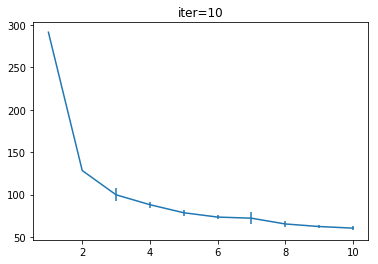

k= 1
init_centroids: [['5.8', '2.7', '5.1', '1.9', 2]]
init_centroids: [['6.5', '3.0', '5.2', '2.0', 2]]
init_centroids: [['5.8', '2.7', '4.1', '1.0', 1]]
init_centroids: [['6.0', '3.0', '4.8', '1.8', 2]]
init_centroids: [['6.7', '3.0', '5.0', '1.7', 1]]
init_centroids: [['5.2', '4.1', '1.5', '0.1', 0]]
init_centroids: [['6.8', '3.2', '5.9', '2.3', 2]]
init_centroids: [['6.8', '3.2', '5.9', '2.3', 2]]
init_centroids: [['5.2', '4.1', '1.5', '0.1', 0]]
init_centroids: [['5.5', '2.5', '4.0', '1.3', 1]]
init_centroids: [['6.1', '2.8', '4.7', '1.2', 1]]
init_centroids: [['6.1', '3.0', '4.6', '1.4', 1]]
init_centroids: [['6.2', '2.9', '4.3', '1.3', 1]]
init_centroids: [['6.3', '2.9', '5.6', '1.8', 2]]
init_centroids: [['6.3', '2.5', '4.9', '1.5', 1]]
init_centroids: [['5.9', '3.0', '5.1', '1.8', 2]]
init_centroids: [['7.3', '2.9', '6.3', '1.8', 2]]
init_centroids: [['5.4', '3.7', '1.5', '0.2', 0]]
init_centroids: [['6.3', '3.3', '4.7', '1.6', 1]]
init_centroids: [['7.2', '3.6', '6.1', '2.5',

init_centroids: [['5.2', '3.4', '1.4', '0.2', 0], ['7.7', '3.0', '6.1', '2.3', 2]]
init_centroids: [['5.0', '3.4', '1.5', '0.2', 0], ['6.3', '3.3', '4.7', '1.6', 1]]
init_centroids: [['6.0', '3.0', '4.8', '1.8', 2], ['7.1', '3.0', '5.9', '2.1', 2]]
init_centroids: [['6.1', '2.6', '5.6', '1.4', 2], ['5.8', '4.0', '1.2', '0.2', 0]]
init_centroids: [['7.2', '3.6', '6.1', '2.5', 2], ['5.0', '3.3', '1.4', '0.2', 0]]
init_centroids: [['5.8', '2.7', '3.9', '1.2', 1], ['5.1', '3.3', '1.7', '0.5', 0]]
init_centroids: [['4.8', '3.1', '1.6', '0.2', 0], ['6.5', '3.0', '5.2', '2.0', 2]]
init_centroids: [['6.3', '2.3', '4.4', '1.3', 1], ['5.8', '4.0', '1.2', '0.2', 0]]
init_centroids: [['5.1', '3.7', '1.5', '0.4', 0], ['6.4', '2.9', '4.3', '1.3', 1]]
init_centroids: [['5.3', '3.7', '1.5', '0.2', 0], ['6.7', '3.3', '5.7', '2.5', 2]]
init_centroids: [['6.0', '2.2', '5.0', '1.5', 2], ['5.2', '4.1', '1.5', '0.1', 0]]
init_centroids: [['5.5', '2.5', '4.0', '1.3', 1], ['7.3', '2.9', '6.3', '1.8', 2]]
init

init_centroids: [['5.2', '3.4', '1.4', '0.2', 0], ['6.8', '2.8', '4.8', '1.4', 1], ['5.0', '3.2', '1.2', '0.2', 0]]
init_centroids: [['5.8', '4.0', '1.2', '0.2', 0], ['5.8', '2.7', '5.1', '1.9', 2], ['6.9', '3.1', '5.1', '2.3', 2]]
init_centroids: [['5.2', '3.5', '1.5', '0.2', 0], ['5.6', '2.8', '4.9', '2.0', 2], ['7.7', '3.8', '6.7', '2.2', 2]]
init_centroids: [['5.7', '2.8', '4.5', '1.3', 1], ['7.7', '3.8', '6.7', '2.2', 2], ['5.6', '3.0', '4.5', '1.5', 1]]
init_centroids: [['5.4', '3.4', '1.5', '0.4', 0], ['6.5', '3.0', '5.2', '2.0', 2], ['5.0', '3.6', '1.4', '0.2', 0]]
init_centroids: [['5.6', '2.9', '3.6', '1.3', 1], ['4.8', '3.4', '1.9', '0.2', 0], ['6.5', '3.0', '5.5', '1.8', 2]]
init_centroids: [['5.8', '2.7', '5.1', '1.9', 2], ['7.1', '3.0', '5.9', '2.1', 2], ['5.6', '3.0', '4.5', '1.5', 1]]
init_centroids: [['5.1', '3.8', '1.5', '0.3', 0], ['7.7', '2.8', '6.7', '2.0', 2], ['7.7', '2.6', '6.9', '2.3', 2]]
init_centroids: [['4.5', '2.3', '1.3', '0.3', 0], ['6.7', '2.5', '5.8', 

init_centroids: [['6.4', '2.9', '4.3', '1.3', 1], ['5.1', '3.4', '1.5', '0.2', 0], ['4.6', '3.6', '1.0', '0.2', 0]]
k= 4
init_centroids: [['4.4', '3.2', '1.3', '0.2', 0], ['6.7', '3.3', '5.7', '2.5', 2], ['6.3', '2.7', '4.9', '1.8', 2], ['6.7', '2.5', '5.8', '1.8', 2]]
init_centroids: [['7.6', '3.0', '6.6', '2.1', 2], ['5.5', '2.6', '4.4', '1.2', 1], ['6.7', '2.5', '5.8', '1.8', 2], ['4.4', '3.2', '1.3', '0.2', 0]]
init_centroids: [['6.5', '3.0', '5.5', '1.8', 2], ['5.0', '3.0', '1.6', '0.2', 0], ['6.5', '3.2', '5.1', '2.0', 2], ['6.6', '3.0', '4.4', '1.4', 1]]
init_centroids: [['6.7', '3.1', '4.4', '1.4', 1], ['7.2', '3.0', '5.8', '1.6', 2], ['5.6', '3.0', '4.1', '1.3', 1], ['5.5', '3.5', '1.3', '0.2', 0]]
init_centroids: [['5.7', '2.9', '4.2', '1.3', 1], ['4.8', '3.1', '1.6', '0.2', 0], ['5.7', '2.8', '4.1', '1.3', 1], ['7.4', '2.8', '6.1', '1.9', 2]]
init_centroids: [['5.5', '3.5', '1.3', '0.2', 0], ['5.6', '3.0', '4.5', '1.5', 1], ['5.7', '2.5', '5.0', '2.0', 2], ['6.7', '3.1', '4.

init_centroids: [['5.8', '2.8', '5.1', '2.4', 2], ['5.4', '3.0', '4.5', '1.5', 1], ['6.6', '3.0', '4.4', '1.4', 1], ['5.2', '2.7', '3.9', '1.4', 1]]
init_centroids: [['6.1', '2.8', '4.7', '1.2', 1], ['5.0', '3.6', '1.4', '0.2', 0], ['6.0', '2.2', '5.0', '1.5', 2], ['6.8', '2.8', '4.8', '1.4', 1]]
init_centroids: [['6.3', '2.3', '4.4', '1.3', 1], ['4.6', '3.2', '1.4', '0.2', 0], ['7.6', '3.0', '6.6', '2.1', 2], ['5.1', '3.5', '1.4', '0.2', 0]]
init_centroids: [['5.1', '3.7', '1.5', '0.4', 0], ['6.1', '2.6', '5.6', '1.4', 2], ['5.5', '4.2', '1.4', '0.2', 0], ['6.8', '3.2', '5.9', '2.3', 2]]
init_centroids: [['4.9', '3.0', '1.4', '0.2', 0], ['6.3', '2.7', '4.9', '1.8', 2], ['5.8', '2.7', '5.1', '1.9', 2], ['6.2', '3.4', '5.4', '2.3', 2]]
init_centroids: [['6.2', '3.4', '5.4', '2.3', 2], ['5.4', '3.9', '1.7', '0.4', 0], ['6.7', '3.1', '4.4', '1.4', 1], ['7.6', '3.0', '6.6', '2.1', 2]]
init_centroids: [['5.2', '4.1', '1.5', '0.1', 0], ['7.4', '2.8', '6.1', '1.9', 2], ['4.6', '3.4', '1.4', '

init_centroids: [['4.9', '3.0', '1.4', '0.2', 0], ['4.7', '3.2', '1.3', '0.2', 0], ['7.7', '3.8', '6.7', '2.2', 2], ['6.0', '2.2', '5.0', '1.5', 2], ['7.2', '3.6', '6.1', '2.5', 2]]
init_centroids: [['4.7', '3.2', '1.6', '0.2', 0], ['6.1', '2.6', '5.6', '1.4', 2], ['4.9', '3.1', '1.5', '0.1', 0], ['7.7', '3.0', '6.1', '2.3', 2], ['4.8', '3.0', '1.4', '0.3', 0]]
init_centroids: [['5.8', '2.7', '5.1', '1.9', 2], ['5.1', '3.8', '1.6', '0.2', 0], ['6.4', '2.8', '5.6', '2.1', 2], ['5.4', '3.0', '4.5', '1.5', 1], ['7.7', '3.0', '6.1', '2.3', 2]]
init_centroids: [['6.2', '2.9', '4.3', '1.3', 1], ['5.8', '2.8', '5.1', '2.4', 2], ['5.5', '2.4', '3.7', '1.0', 1], ['6.3', '2.5', '4.9', '1.5', 1], ['4.5', '2.3', '1.3', '0.3', 0]]
init_centroids: [['4.9', '3.1', '1.5', '0.1', 0], ['5.8', '2.8', '5.1', '2.4', 2], ['6.7', '3.1', '4.4', '1.4', 1], ['7.2', '3.2', '6.0', '1.8', 2], ['6.3', '3.4', '5.6', '2.4', 2]]
init_centroids: [['7.0', '3.2', '4.7', '1.4', 1], ['5.7', '2.6', '3.5', '1.0', 1], ['7.4',

init_centroids: [['4.8', '3.4', '1.6', '0.2', 0], ['5.5', '2.6', '4.4', '1.2', 1], ['5.0', '3.4', '1.6', '0.4', 0], ['6.4', '3.2', '5.3', '2.3', 2], ['6.3', '2.9', '5.6', '1.8', 2]]
init_centroids: [['7.7', '3.0', '6.1', '2.3', 2], ['5.5', '2.4', '3.7', '1.0', 1], ['5.0', '3.6', '1.4', '0.2', 0], ['6.0', '2.2', '5.0', '1.5', 2], ['7.4', '2.8', '6.1', '1.9', 2]]
init_centroids: [['7.4', '2.8', '6.1', '1.9', 2], ['4.7', '3.2', '1.6', '0.2', 0], ['6.3', '3.4', '5.6', '2.4', 2], ['5.2', '3.5', '1.5', '0.2', 0], ['5.0', '3.2', '1.2', '0.2', 0]]
init_centroids: [['6.7', '3.1', '4.7', '1.5', 1], ['4.7', '3.2', '1.6', '0.2', 0], ['7.2', '3.2', '6.0', '1.8', 2], ['6.9', '3.1', '5.1', '2.3', 2], ['4.8', '3.0', '1.4', '0.3', 0]]
init_centroids: [['6.5', '3.0', '5.2', '2.0', 2], ['5.5', '2.4', '3.7', '1.0', 1], ['4.9', '3.0', '1.4', '0.2', 0], ['6.8', '2.8', '4.8', '1.4', 1], ['6.9', '3.1', '5.1', '2.3', 2]]
init_centroids: [['5.4', '3.4', '1.5', '0.4', 0], ['6.1', '2.8', '4.0', '1.3', 1], ['6.9',

init_centroids: [['5.6', '3.0', '4.5', '1.5', 1], ['4.8', '3.1', '1.6', '0.2', 0], ['5.1', '3.8', '1.5', '0.3', 0], ['6.4', '3.2', '5.3', '2.3', 2], ['4.4', '2.9', '1.4', '0.2', 0], ['5.5', '2.6', '4.4', '1.2', 1]]
init_centroids: [['6.3', '2.7', '4.9', '1.8', 2], ['6.6', '2.9', '4.6', '1.3', 1], ['4.4', '2.9', '1.4', '0.2', 0], ['6.2', '2.8', '4.8', '1.8', 2], ['5.1', '3.8', '1.5', '0.3', 0], ['4.7', '3.2', '1.3', '0.2', 0]]
init_centroids: [['4.7', '3.2', '1.3', '0.2', 0], ['6.3', '2.5', '5.0', '1.9', 2], ['7.7', '3.0', '6.1', '2.3', 2], ['5.5', '2.5', '4.0', '1.3', 1], ['5.1', '3.4', '1.5', '0.2', 0], ['5.8', '2.7', '3.9', '1.2', 1]]
init_centroids: [['4.4', '2.9', '1.4', '0.2', 0], ['7.9', '3.8', '6.4', '2.0', 2], ['5.5', '2.6', '4.4', '1.2', 1], ['6.4', '3.1', '5.5', '1.8', 2], ['7.6', '3.0', '6.6', '2.1', 2], ['5.1', '3.5', '1.4', '0.2', 0]]
init_centroids: [['5.4', '3.4', '1.5', '0.4', 0], ['6.3', '3.4', '5.6', '2.4', 2], ['6.5', '3.2', '5.1', '2.0', 2], ['5.2', '3.4', '1.4', '0

init_centroids: [['5.0', '3.4', '1.6', '0.4', 0], ['6.9', '3.1', '5.4', '2.1', 2], ['7.7', '3.8', '6.7', '2.2', 2], ['7.7', '2.8', '6.7', '2.0', 2], ['7.3', '2.9', '6.3', '1.8', 2], ['6.1', '3.0', '4.9', '1.8', 2]]
init_centroids: [['7.9', '3.8', '6.4', '2.0', 2], ['6.3', '2.9', '5.6', '1.8', 2], ['5.9', '3.2', '4.8', '1.8', 1], ['5.5', '2.5', '4.0', '1.3', 1], ['5.1', '3.8', '1.5', '0.3', 0], ['4.4', '2.9', '1.4', '0.2', 0]]
init_centroids: [['6.2', '2.9', '4.3', '1.3', 1], ['7.7', '2.8', '6.7', '2.0', 2], ['5.1', '3.3', '1.7', '0.5', 0], ['4.4', '3.0', '1.3', '0.2', 0], ['5.1', '3.8', '1.6', '0.2', 0], ['5.0', '3.4', '1.5', '0.2', 0]]
init_centroids: [['5.8', '2.7', '5.1', '1.9', 2], ['5.1', '3.3', '1.7', '0.5', 0], ['7.2', '3.6', '6.1', '2.5', 2], ['4.6', '3.1', '1.5', '0.2', 0], ['4.4', '3.2', '1.3', '0.2', 0], ['7.4', '2.8', '6.1', '1.9', 2]]
init_centroids: [['4.6', '3.4', '1.4', '0.3', 0], ['5.7', '2.8', '4.1', '1.3', 1], ['5.0', '3.5', '1.6', '0.6', 0], ['6.3', '3.4', '5.6', '2

init_centroids: [['6.0', '2.2', '5.0', '1.5', 2], ['4.6', '3.1', '1.5', '0.2', 0], ['6.7', '3.1', '4.4', '1.4', 1], ['6.5', '3.2', '5.1', '2.0', 2], ['4.9', '3.1', '1.5', '0.1', 0], ['6.3', '2.8', '5.1', '1.5', 2]]
init_centroids: [['6.2', '3.4', '5.4', '2.3', 2], ['5.5', '2.6', '4.4', '1.2', 1], ['4.9', '3.1', '1.5', '0.1', 0], ['6.0', '2.2', '5.0', '1.5', 2], ['7.2', '3.2', '6.0', '1.8', 2], ['5.5', '2.3', '4.0', '1.3', 1]]
init_centroids: [['5.5', '2.4', '3.8', '1.1', 1], ['4.4', '2.9', '1.4', '0.2', 0], ['6.3', '2.9', '5.6', '1.8', 2], ['5.7', '3.8', '1.7', '0.3', 0], ['7.2', '3.6', '6.1', '2.5', 2], ['5.9', '3.2', '4.8', '1.8', 1]]
init_centroids: [['5.2', '3.4', '1.4', '0.2', 0], ['5.6', '2.5', '3.9', '1.1', 1], ['5.8', '2.8', '5.1', '2.4', 2], ['4.9', '3.0', '1.4', '0.2', 0], ['6.4', '3.2', '4.5', '1.5', 1], ['6.9', '3.1', '5.1', '2.3', 2]]
init_centroids: [['5.6', '2.9', '3.6', '1.3', 1], ['5.2', '3.4', '1.4', '0.2', 0], ['4.8', '3.0', '1.4', '0.1', 0], ['6.1', '2.9', '4.7', '1

init_centroids: [['6.3', '2.7', '4.9', '1.8', 2], ['4.5', '2.3', '1.3', '0.3', 0], ['6.3', '2.5', '5.0', '1.9', 2], ['4.4', '3.0', '1.3', '0.2', 0], ['6.3', '2.8', '5.1', '1.5', 2], ['6.3', '3.4', '5.6', '2.4', 2], ['7.2', '3.0', '5.8', '1.6', 2]]
init_centroids: [['5.5', '3.5', '1.3', '0.2', 0], ['6.2', '2.9', '4.3', '1.3', 1], ['7.7', '2.8', '6.7', '2.0', 2], ['5.1', '3.8', '1.5', '0.3', 0], ['4.9', '3.1', '1.5', '0.1', 0], ['6.3', '2.5', '4.9', '1.5', 1], ['5.0', '3.0', '1.6', '0.2', 0]]
init_centroids: [['5.8', '2.7', '5.1', '1.9', 2], ['6.1', '2.9', '4.7', '1.4', 1], ['4.6', '3.4', '1.4', '0.3', 0], ['5.7', '4.4', '1.5', '0.4', 0], ['6.8', '3.2', '5.9', '2.3', 2], ['5.7', '2.8', '4.5', '1.3', 1], ['4.8', '3.1', '1.6', '0.2', 0]]
init_centroids: [['5.5', '2.6', '4.4', '1.2', 1], ['5.0', '2.0', '3.5', '1.0', 1], ['7.2', '3.6', '6.1', '2.5', 2], ['6.7', '2.5', '5.8', '1.8', 2], ['6.2', '2.2', '4.5', '1.5', 1], ['6.3', '2.8', '5.1', '1.5', 2], ['7.0', '3.2', '4.7', '1.4', 1]]
init_cen

init_centroids: [['6.0', '2.9', '4.5', '1.5', 1], ['6.4', '2.7', '5.3', '1.9', 2], ['5.5', '2.3', '4.0', '1.3', 1], ['5.1', '3.8', '1.5', '0.3', 0], ['6.1', '2.8', '4.0', '1.3', 1], ['5.0', '3.3', '1.4', '0.2', 0], ['5.1', '3.5', '1.4', '0.2', 0]]
init_centroids: [['4.4', '3.0', '1.3', '0.2', 0], ['6.7', '3.0', '5.2', '2.3', 2], ['6.1', '3.0', '4.9', '1.8', 2], ['5.8', '2.6', '4.0', '1.2', 1], ['6.2', '2.2', '4.5', '1.5', 1], ['6.1', '2.6', '5.6', '1.4', 2], ['5.4', '3.9', '1.7', '0.4', 0]]
init_centroids: [['6.5', '3.0', '5.8', '2.2', 2], ['7.7', '3.0', '6.1', '2.3', 2], ['4.3', '3.0', '1.1', '0.1', 0], ['5.0', '3.6', '1.4', '0.2', 0], ['5.0', '3.4', '1.5', '0.2', 0], ['5.0', '3.3', '1.4', '0.2', 0], ['6.4', '3.1', '5.5', '1.8', 2]]
init_centroids: [['6.8', '2.8', '4.8', '1.4', 1], ['5.0', '3.0', '1.6', '0.2', 0], ['6.9', '3.1', '5.1', '2.3', 2], ['6.0', '3.0', '4.8', '1.8', 2], ['6.0', '2.2', '4.0', '1.0', 1], ['5.7', '2.8', '4.5', '1.3', 1], ['4.6', '3.4', '1.4', '0.3', 0]]
init_cen

init_centroids: [['7.7', '2.8', '6.7', '2.0', 2], ['5.1', '3.8', '1.9', '0.4', 0], ['5.0', '3.6', '1.4', '0.2', 0], ['6.1', '2.9', '4.7', '1.4', 1], ['6.3', '3.3', '6.0', '2.5', 2], ['5.7', '2.8', '4.5', '1.3', 1], ['5.1', '3.3', '1.7', '0.5', 0]]
init_centroids: [['6.0', '3.0', '4.8', '1.8', 2], ['5.1', '3.8', '1.9', '0.4', 0], ['4.5', '2.3', '1.3', '0.3', 0], ['4.9', '3.0', '1.4', '0.2', 0], ['7.2', '3.2', '6.0', '1.8', 2], ['6.6', '3.0', '4.4', '1.4', 1], ['5.8', '2.7', '5.1', '1.9', 2]]
init_centroids: [['4.8', '3.4', '1.6', '0.2', 0], ['5.9', '3.0', '4.2', '1.5', 1], ['5.4', '3.9', '1.3', '0.4', 0], ['5.4', '3.0', '4.5', '1.5', 1], ['6.2', '2.2', '4.5', '1.5', 1], ['7.7', '3.8', '6.7', '2.2', 2], ['5.8', '4.0', '1.2', '0.2', 0]]
init_centroids: [['5.5', '2.6', '4.4', '1.2', 1], ['6.9', '3.1', '4.9', '1.5', 1], ['5.4', '3.4', '1.5', '0.4', 0], ['4.7', '3.2', '1.3', '0.2', 0], ['5.5', '4.2', '1.4', '0.2', 0], ['5.0', '3.2', '1.2', '0.2', 0], ['5.2', '4.1', '1.5', '0.1', 0]]
init_cen

init_centroids: [['6.7', '3.3', '5.7', '2.1', 2], ['4.7', '3.2', '1.3', '0.2', 0], ['5.0', '3.6', '1.4', '0.2', 0], ['7.0', '3.2', '4.7', '1.4', 1], ['6.9', '3.1', '4.9', '1.5', 1], ['5.5', '2.4', '3.8', '1.1', 1], ['6.0', '2.2', '5.0', '1.5', 2], ['6.4', '3.2', '4.5', '1.5', 1]]
init_centroids: [['5.1', '3.8', '1.9', '0.4', 0], ['7.7', '3.0', '6.1', '2.3', 2], ['6.4', '2.7', '5.3', '1.9', 2], ['4.8', '3.0', '1.4', '0.3', 0], ['4.9', '3.1', '1.5', '0.1', 0], ['5.7', '3.8', '1.7', '0.3', 0], ['6.1', '2.8', '4.0', '1.3', 1], ['7.7', '2.6', '6.9', '2.3', 2]]
init_centroids: [['7.3', '2.9', '6.3', '1.8', 2], ['4.9', '2.5', '4.5', '1.7', 2], ['6.2', '3.4', '5.4', '2.3', 2], ['5.7', '2.8', '4.5', '1.3', 1], ['4.4', '3.2', '1.3', '0.2', 0], ['7.7', '3.8', '6.7', '2.2', 2], ['5.1', '3.8', '1.9', '0.4', 0], ['4.9', '3.1', '1.5', '0.1', 0]]
init_centroids: [['6.4', '2.8', '5.6', '2.1', 2], ['5.0', '3.5', '1.3', '0.3', 0], ['5.7', '4.4', '1.5', '0.4', 0], ['5.0', '3.5', '1.6', '0.6', 0], ['5.4', 

init_centroids: [['6.5', '3.2', '5.1', '2.0', 2], ['5.0', '2.3', '3.3', '1.0', 1], ['7.3', '2.9', '6.3', '1.8', 2], ['5.2', '4.1', '1.5', '0.1', 0], ['4.7', '3.2', '1.6', '0.2', 0], ['4.8', '3.1', '1.6', '0.2', 0], ['5.7', '4.4', '1.5', '0.4', 0], ['4.4', '3.0', '1.3', '0.2', 0]]
init_centroids: [['6.7', '3.3', '5.7', '2.1', 2], ['4.8', '3.4', '1.6', '0.2', 0], ['7.2', '3.6', '6.1', '2.5', 2], ['4.4', '2.9', '1.4', '0.2', 0], ['6.3', '3.4', '5.6', '2.4', 2], ['4.5', '2.3', '1.3', '0.3', 0], ['5.9', '3.0', '4.2', '1.5', 1], ['7.6', '3.0', '6.6', '2.1', 2]]
init_centroids: [['5.1', '3.5', '1.4', '0.2', 0], ['7.0', '3.2', '4.7', '1.4', 1], ['5.0', '3.6', '1.4', '0.2', 0], ['6.1', '3.0', '4.6', '1.4', 1], ['7.9', '3.8', '6.4', '2.0', 2], ['6.1', '2.8', '4.7', '1.2', 1], ['7.7', '3.0', '6.1', '2.3', 2], ['5.0', '3.2', '1.2', '0.2', 0]]
init_centroids: [['6.4', '3.2', '4.5', '1.5', 1], ['5.9', '3.0', '5.1', '1.8', 2], ['5.0', '3.5', '1.3', '0.3', 0], ['6.1', '2.8', '4.7', '1.2', 1], ['5.4', 

init_centroids: [['7.6', '3.0', '6.6', '2.1', 2], ['5.2', '4.1', '1.5', '0.1', 0], ['6.0', '2.7', '5.1', '1.6', 1], ['6.8', '2.8', '4.8', '1.4', 1], ['6.0', '2.2', '5.0', '1.5', 2], ['7.2', '3.0', '5.8', '1.6', 2], ['6.7', '3.1', '5.6', '2.4', 2], ['5.0', '3.0', '1.6', '0.2', 0]]
init_centroids: [['6.7', '3.3', '5.7', '2.1', 2], ['5.3', '3.7', '1.5', '0.2', 0], ['6.9', '3.1', '4.9', '1.5', 1], ['4.9', '3.0', '1.4', '0.2', 0], ['4.6', '3.6', '1.0', '0.2', 0], ['6.7', '3.1', '4.7', '1.5', 1], ['6.2', '2.2', '4.5', '1.5', 1], ['6.4', '3.2', '5.3', '2.3', 2]]
init_centroids: [['5.5', '3.5', '1.3', '0.2', 0], ['5.8', '2.7', '4.1', '1.0', 1], ['5.8', '2.7', '3.9', '1.2', 1], ['6.7', '2.5', '5.8', '1.8', 2], ['5.0', '3.0', '1.6', '0.2', 0], ['6.7', '3.1', '5.6', '2.4', 2], ['6.5', '3.0', '5.8', '2.2', 2], ['5.4', '3.7', '1.5', '0.2', 0]]
init_centroids: [['5.8', '2.7', '3.9', '1.2', 1], ['5.1', '3.8', '1.6', '0.2', 0], ['5.0', '3.6', '1.4', '0.2', 0], ['4.7', '3.2', '1.3', '0.2', 0], ['5.0', 

init_centroids: [['6.3', '3.4', '5.6', '2.4', 2], ['5.4', '3.7', '1.5', '0.2', 0], ['4.4', '2.9', '1.4', '0.2', 0], ['5.9', '3.2', '4.8', '1.8', 1], ['4.9', '3.1', '1.5', '0.1', 0], ['6.0', '2.7', '5.1', '1.6', 1], ['4.6', '3.6', '1.0', '0.2', 0], ['6.9', '3.1', '4.9', '1.5', 1], ['5.1', '3.8', '1.6', '0.2', 0]]
init_centroids: [['5.7', '3.8', '1.7', '0.3', 0], ['6.2', '2.2', '4.5', '1.5', 1], ['4.8', '3.4', '1.9', '0.2', 0], ['7.7', '2.8', '6.7', '2.0', 2], ['7.4', '2.8', '6.1', '1.9', 2], ['6.4', '3.2', '5.3', '2.3', 2], ['5.5', '2.6', '4.4', '1.2', 1], ['6.0', '2.9', '4.5', '1.5', 1], ['5.4', '3.4', '1.5', '0.4', 0]]
init_centroids: [['7.2', '3.0', '5.8', '1.6', 2], ['4.6', '3.4', '1.4', '0.3', 0], ['5.1', '3.4', '1.5', '0.2', 0], ['6.2', '2.8', '4.8', '1.8', 2], ['7.6', '3.0', '6.6', '2.1', 2], ['5.9', '3.0', '5.1', '1.8', 2], ['5.5', '3.5', '1.3', '0.2', 0], ['5.5', '2.4', '3.7', '1.0', 1], ['4.9', '2.5', '4.5', '1.7', 2]]
init_centroids: [['7.0', '3.2', '4.7', '1.4', 1], ['4.6', 

init_centroids: [['5.5', '3.5', '1.3', '0.2', 0], ['6.3', '3.3', '6.0', '2.5', 2], ['6.5', '3.0', '5.2', '2.0', 2], ['5.7', '4.4', '1.5', '0.4', 0], ['5.0', '2.0', '3.5', '1.0', 1], ['7.7', '3.8', '6.7', '2.2', 2], ['5.1', '2.5', '3.0', '1.1', 1], ['5.0', '3.4', '1.5', '0.2', 0], ['6.0', '2.2', '5.0', '1.5', 2]]
init_centroids: [['5.2', '3.5', '1.5', '0.2', 0], ['7.3', '2.9', '6.3', '1.8', 2], ['6.1', '3.0', '4.6', '1.4', 1], ['6.4', '2.8', '5.6', '2.2', 2], ['5.6', '2.8', '4.9', '2.0', 2], ['6.4', '2.9', '4.3', '1.3', 1], ['5.1', '3.5', '1.4', '0.2', 0], ['4.8', '3.4', '1.9', '0.2', 0], ['5.0', '3.4', '1.6', '0.4', 0]]
init_centroids: [['4.4', '3.0', '1.3', '0.2', 0], ['6.7', '3.3', '5.7', '2.5', 2], ['6.7', '3.3', '5.7', '2.1', 2], ['5.5', '4.2', '1.4', '0.2', 0], ['4.6', '3.2', '1.4', '0.2', 0], ['6.5', '3.0', '5.8', '2.2', 2], ['6.7', '3.1', '5.6', '2.4', 2], ['5.2', '3.5', '1.5', '0.2', 0], ['6.3', '2.9', '5.6', '1.8', 2]]
init_centroids: [['4.6', '3.1', '1.5', '0.2', 0], ['6.7', 

init_centroids: [['5.0', '3.4', '1.5', '0.2', 0], ['7.0', '3.2', '4.7', '1.4', 1], ['4.8', '3.4', '1.6', '0.2', 0], ['5.0', '2.3', '3.3', '1.0', 1], ['4.4', '3.2', '1.3', '0.2', 0], ['5.0', '3.3', '1.4', '0.2', 0], ['7.2', '3.6', '6.1', '2.5', 2], ['4.8', '3.4', '1.9', '0.2', 0], ['6.1', '2.8', '4.0', '1.3', 1]]
init_centroids: [['7.2', '3.2', '6.0', '1.8', 2], ['5.4', '3.9', '1.7', '0.4', 0], ['5.2', '2.7', '3.9', '1.4', 1], ['5.1', '3.4', '1.5', '0.2', 0], ['6.9', '3.1', '5.4', '2.1', 2], ['6.4', '3.2', '5.3', '2.3', 2], ['4.8', '3.4', '1.6', '0.2', 0], ['4.3', '3.0', '1.1', '0.1', 0], ['5.0', '3.5', '1.3', '0.3', 0]]
init_centroids: [['7.0', '3.2', '4.7', '1.4', 1], ['4.3', '3.0', '1.1', '0.1', 0], ['6.4', '3.2', '4.5', '1.5', 1], ['7.1', '3.0', '5.9', '2.1', 2], ['6.0', '2.7', '5.1', '1.6', 1], ['6.3', '2.3', '4.4', '1.3', 1], ['6.0', '2.2', '5.0', '1.5', 2], ['5.0', '3.6', '1.4', '0.2', 0], ['5.2', '4.1', '1.5', '0.1', 0]]
init_centroids: [['4.8', '3.0', '1.4', '0.1', 0], ['6.2', 

init_centroids: [['7.2', '3.6', '6.1', '2.5', 2], ['5.2', '2.7', '3.9', '1.4', 1], ['4.9', '3.0', '1.4', '0.2', 0], ['5.4', '3.4', '1.7', '0.2', 0], ['7.7', '2.6', '6.9', '2.3', 2], ['5.0', '3.3', '1.4', '0.2', 0], ['5.1', '3.5', '1.4', '0.2', 0], ['4.6', '3.6', '1.0', '0.2', 0], ['6.2', '2.9', '4.3', '1.3', 1]]
init_centroids: [['6.1', '2.8', '4.7', '1.2', 1], ['5.5', '4.2', '1.4', '0.2', 0], ['7.7', '2.8', '6.7', '2.0', 2], ['5.4', '3.4', '1.5', '0.4', 0], ['6.9', '3.1', '5.1', '2.3', 2], ['6.4', '2.8', '5.6', '2.1', 2], ['5.0', '3.4', '1.6', '0.4', 0], ['5.1', '3.5', '1.4', '0.2', 0], ['5.2', '3.5', '1.5', '0.2', 0]]
init_centroids: [['6.2', '2.2', '4.5', '1.5', 1], ['5.8', '2.8', '5.1', '2.4', 2], ['6.1', '2.8', '4.0', '1.3', 1], ['5.7', '2.9', '4.2', '1.3', 1], ['4.8', '3.0', '1.4', '0.3', 0], ['4.9', '3.1', '1.5', '0.1', 0], ['6.7', '3.0', '5.0', '1.7', 1], ['6.5', '2.8', '4.6', '1.5', 1], ['5.7', '2.8', '4.5', '1.3', 1]]
init_centroids: [['7.7', '2.6', '6.9', '2.3', 2], ['4.8', 

init_centroids: [['5.0', '2.3', '3.3', '1.0', 1], ['5.7', '2.5', '5.0', '2.0', 2], ['4.3', '3.0', '1.1', '0.1', 0], ['6.0', '2.2', '5.0', '1.5', 2], ['6.4', '3.2', '4.5', '1.5', 1], ['6.7', '3.1', '4.4', '1.4', 1], ['5.8', '2.7', '5.1', '1.9', 2], ['5.4', '3.4', '1.7', '0.2', 0], ['6.4', '2.7', '5.3', '1.9', 2], ['5.5', '2.6', '4.4', '1.2', 1]]
init_centroids: [['6.3', '2.3', '4.4', '1.3', 1], ['5.4', '3.9', '1.7', '0.4', 0], ['6.6', '3.0', '4.4', '1.4', 1], ['5.0', '2.3', '3.3', '1.0', 1], ['4.6', '3.4', '1.4', '0.3', 0], ['6.8', '2.8', '4.8', '1.4', 1], ['5.1', '3.4', '1.5', '0.2', 0], ['6.4', '2.8', '5.6', '2.1', 2], ['6.7', '3.3', '5.7', '2.5', 2], ['6.5', '3.2', '5.1', '2.0', 2]]
init_centroids: [['4.9', '3.1', '1.5', '0.1', 0], ['6.1', '3.0', '4.9', '1.8', 2], ['5.1', '3.7', '1.5', '0.4', 0], ['7.2', '3.6', '6.1', '2.5', 2], ['6.3', '2.5', '5.0', '1.9', 2], ['6.3', '3.3', '4.7', '1.6', 1], ['4.5', '2.3', '1.3', '0.3', 0], ['4.4', '2.9', '1.4', '0.2', 0], ['6.4', '2.8', '5.6', '2.

init_centroids: [['5.5', '2.6', '4.4', '1.2', 1], ['5.0', '3.0', '1.6', '0.2', 0], ['7.0', '3.2', '4.7', '1.4', 1], ['4.6', '3.2', '1.4', '0.2', 0], ['7.2', '3.2', '6.0', '1.8', 2], ['5.5', '2.4', '3.7', '1.0', 1], ['6.4', '2.8', '5.6', '2.2', 2], ['6.1', '2.8', '4.0', '1.3', 1], ['6.4', '3.1', '5.5', '1.8', 2], ['5.6', '2.5', '3.9', '1.1', 1]]
init_centroids: [['6.3', '2.3', '4.4', '1.3', 1], ['4.8', '3.0', '1.4', '0.3', 0], ['5.6', '2.5', '3.9', '1.1', 1], ['6.0', '2.2', '5.0', '1.5', 2], ['6.4', '2.8', '5.6', '2.1', 2], ['5.1', '3.8', '1.5', '0.3', 0], ['6.9', '3.1', '5.1', '2.3', 2], ['5.1', '3.5', '1.4', '0.2', 0], ['6.5', '3.2', '5.1', '2.0', 2], ['5.2', '3.5', '1.5', '0.2', 0]]
init_centroids: [['5.0', '3.4', '1.6', '0.4', 0], ['7.7', '3.0', '6.1', '2.3', 2], ['5.4', '3.9', '1.7', '0.4', 0], ['4.4', '3.0', '1.3', '0.2', 0], ['4.7', '3.2', '1.6', '0.2', 0], ['5.1', '3.7', '1.5', '0.4', 0], ['5.0', '3.2', '1.2', '0.2', 0], ['5.1', '3.3', '1.7', '0.5', 0], ['6.3', '2.5', '5.0', '1.

init_centroids: [['5.1', '3.8', '1.9', '0.4', 0], ['5.7', '2.8', '4.1', '1.3', 1], ['6.4', '2.8', '5.6', '2.1', 2], ['5.2', '3.4', '1.4', '0.2', 0], ['5.1', '3.4', '1.5', '0.2', 0], ['5.1', '3.5', '1.4', '0.3', 0], ['4.9', '2.5', '4.5', '1.7', 2], ['5.6', '2.5', '3.9', '1.1', 1], ['4.9', '3.1', '1.5', '0.1', 0], ['7.2', '3.6', '6.1', '2.5', 2]]
init_centroids: [['6.4', '3.2', '4.5', '1.5', 1], ['4.4', '3.0', '1.3', '0.2', 0], ['5.0', '2.3', '3.3', '1.0', 1], ['5.5', '2.4', '3.7', '1.0', 1], ['6.5', '3.0', '5.2', '2.0', 2], ['4.8', '3.4', '1.9', '0.2', 0], ['6.6', '3.0', '4.4', '1.4', 1], ['6.5', '3.0', '5.8', '2.2', 2], ['5.7', '4.4', '1.5', '0.4', 0], ['4.6', '3.6', '1.0', '0.2', 0]]
init_centroids: [['6.6', '3.0', '4.4', '1.4', 1], ['5.1', '3.5', '1.4', '0.2', 0], ['5.8', '2.6', '4.0', '1.2', 1], ['7.2', '3.0', '5.8', '1.6', 2], ['6.9', '3.1', '5.1', '2.3', 2], ['6.3', '2.7', '4.9', '1.8', 2], ['4.7', '3.2', '1.3', '0.2', 0], ['5.5', '2.4', '3.7', '1.0', 1], ['6.4', '2.8', '5.6', '2.

init_centroids: [['5.0', '3.0', '1.6', '0.2', 0], ['6.9', '3.1', '4.9', '1.5', 1], ['5.0', '2.0', '3.5', '1.0', 1], ['6.5', '3.0', '5.2', '2.0', 2], ['7.4', '2.8', '6.1', '1.9', 2], ['4.8', '3.0', '1.4', '0.1', 0], ['6.3', '2.3', '4.4', '1.3', 1], ['6.2', '2.8', '4.8', '1.8', 2], ['6.7', '3.3', '5.7', '2.5', 2], ['5.0', '3.4', '1.5', '0.2', 0]]
init_centroids: [['5.8', '2.6', '4.0', '1.2', 1], ['4.8', '3.4', '1.9', '0.2', 0], ['5.8', '2.7', '5.1', '1.9', 2], ['4.6', '3.4', '1.4', '0.3', 0], ['6.2', '2.8', '4.8', '1.8', 2], ['6.2', '2.2', '4.5', '1.5', 1], ['6.4', '3.2', '4.5', '1.5', 1], ['7.2', '3.0', '5.8', '1.6', 2], ['4.5', '2.3', '1.3', '0.3', 0], ['5.5', '4.2', '1.4', '0.2', 0]]
init_centroids: [['5.4', '3.4', '1.5', '0.4', 0], ['7.1', '3.0', '5.9', '2.1', 2], ['6.8', '3.2', '5.9', '2.3', 2], ['5.0', '2.0', '3.5', '1.0', 1], ['5.5', '2.3', '4.0', '1.3', 1], ['4.9', '3.1', '1.5', '0.1', 0], ['5.3', '3.7', '1.5', '0.2', 0], ['4.3', '3.0', '1.1', '0.1', 0], ['4.6', '3.4', '1.4', '0.

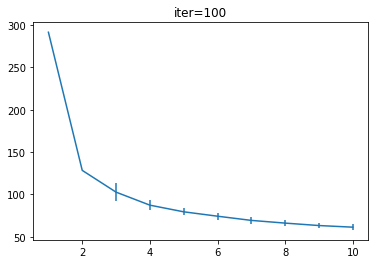

In [4]:
max_iter = [1,2,10,100]
#max_iter = [500]
for _iter in range(len(max_iter)):
    knee_plot = [-1]*10
    iter = max_iter[_iter] # 2/ 10/ 100
    knee_plot_analysisi = []
    for _k in range(10):
        # generate random init_centroids
        k=_k+1
        print("k=",k)
        for m in range(iter):
            # generate initial centroid
            init_centroids = kmeanspp(attr_target_list, k)
            print("init_centroids:",init_centroids)
            # if there is duplicate point, re-initialize
            while check_init(init_centroids, k):
                init_centroids = []
                init_centroids = kmeanspp(attr_target_list, k)
            # use the init_centroids to do k-means
            cluster_assignments,cluster_centroids = k_means_cs171(attr_target_list, k, init_centroids)
            # print(cluster_assignments)
            # print(cluster_centroids)
            knee_plot[_k] = sum_of_error2(attr_target_list, cluster_assignments,cluster_centroids)
            knee_plot_analysisi.append(knee_plot[_k])
    print("knee_plot_analysisi",knee_plot_analysisi)
    aver = []
    sd = []
    # extract the value in knee_plot_analysisi[] and knee-plot
    for i in range(10):
        sub_list = knee_plot_analysisi[i*iter:i*iter+iter]
        aver.append(mean(sub_list))
        sd.append(np.std(sub_list))
    print(aver)
    print(sd)
    X = np.arange(1,11,1)
    plt.errorbar(X,aver,yerr=sd)
    plt.title("iter="+str(iter))
    plt.show()
